### Python Module of the Week: `scikit-image`
---

- **Official Documentation**: https://scikit-image.org/
- **Example Gallery**: https://scikit-image.org/docs/stable/auto_examples/

**scikit-image** is a collection of algorithms for image processing. It exposes a simple interface
which can be used to perform a number of different image processing tasks. 



We can load images into Python using `imread`, part of the scikit-image library. Note that we first need to import `imread` from `skimage.io` to import it:

In [4]:
from skimage.io import imread


img_path1 = "C:/Users/jtriv/OneDrive/Desktop/fermi.jpg" # greyscale
img_path2 = "C:/Users/jtriv/OneDrive/Desktop/sunflower.jpg" # color

img1 = imread(img_path1)
img2 = imread(img_path2)


print(f"type(img1): {type(img1)}")
print(f"type(img2): {type(img2)}\n")

print(f"img1.shape: {img1.shape}")
print(f"img2.shape: {img2.shape}")



type(img1): <class 'numpy.ndarray'>
type(img2): <class 'numpy.ndarray'>

img1.shape: (920, 1200, 3)
img2.shape: (1555, 1404, 3)


We can display our images using matplotlib, which will be the focus of a future PyMOTW:

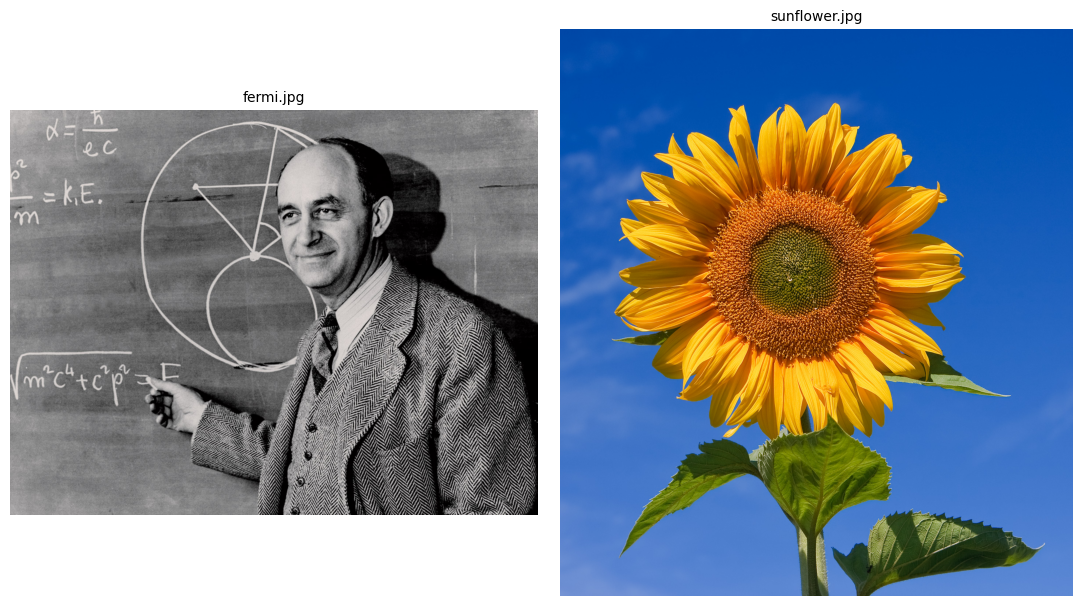

In [6]:

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(11, 6), tight_layout=False)

ax[0].imshow(img1)
ax[0].set_title("fermi.jpg", size=10)
ax[0].set_axis_off()

ax[1].imshow(img2)
ax[1].set_title("sunflower.jpg", size=10)
ax[1].set_axis_off()

plt.show()


We can resize our images to same dimensionality by using skimage's `resize` function:

In [7]:

from skimage.transform import resize


# Make both images 500 x 500. 
new_shape = (500, 500)

resize1 = resize(img1, new_shape)
resize2 = resize(img2, new_shape)


print(f"type(resize1): {type(resize1)}")
print(f"type(resize2): {type(resize2)}\n")
print(f"resize1.shape: {resize1.shape}")
print(f"resize2.shape: {resize2.shape}")


type(resize1): <class 'numpy.ndarray'>
type(resize2): <class 'numpy.ndarray'>

resize1.shape: (500, 500, 3)
resize2.shape: (500, 500, 3)


Display resized images:


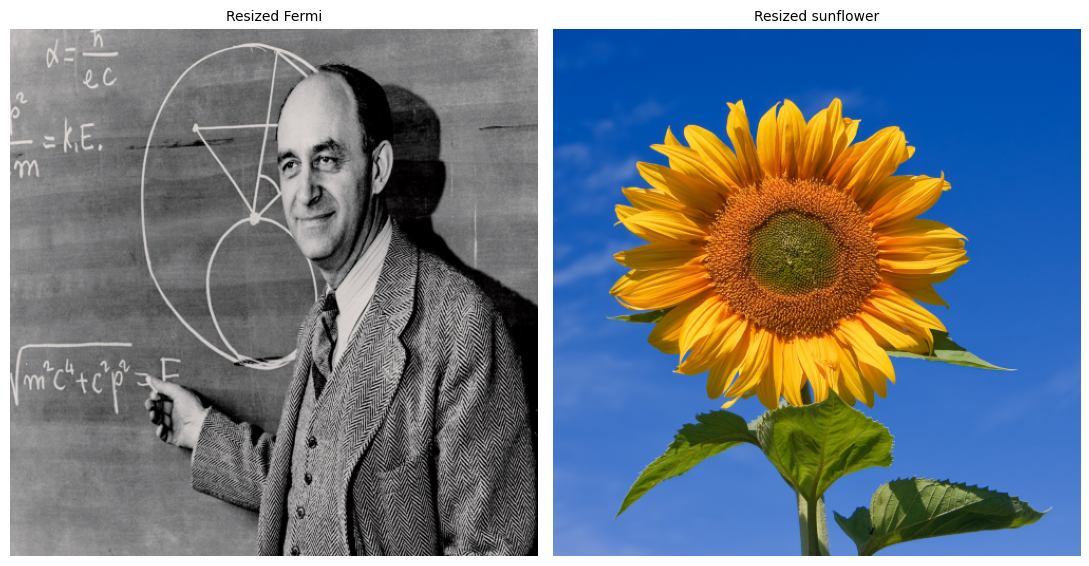

In [9]:


fig, ax = plt.subplots(1, 2, figsize=(11, 6), tight_layout=False)

ax[0].imshow(resize1)
ax[0].set_title("Resized Fermi", size=10)
ax[0].set_axis_off()

ax[1].imshow(resize2)
ax[1].set_title("Resized sunflower", size=10)
ax[1].set_axis_off()

plt.show()


## Creating Hybrid Images

We can take two greyscale images, apply a high-pass filter to one, a low pass filter to the other, then take the average of each pixel value to create a hybrid image.
Here we pass the `as_gray` parameter to `imread` to ensure we get back 2D arrays (as opposed to 3D arrays):

In [10]:


img_path3 = "C:/Users/jtriv/OneDrive/Desktop/camera.jpg"
img_path4 = "C:/Users/jtriv/OneDrive/Desktop/eye.jpg"

img3 = imread(img_path3, as_gray=True)
img4 = imread(img_path4, as_gray=True)


print(f"type(img3): {type(img3)}")
print(f"type(img4): {type(img4)}\n")

print(f"img3.shape: {img3.shape}")
print(f"img4.shape: {img4.shape}")




type(img3): <class 'numpy.ndarray'>
type(img4): <class 'numpy.ndarray'>

img3.shape: (235, 340)
img4.shape: (235, 340)


The two images are displayed side-by-side. Now that the images are two dimensional, we need to specify a colormap within `imshow`. By default greyscale images will be displayed with a greenish hue:

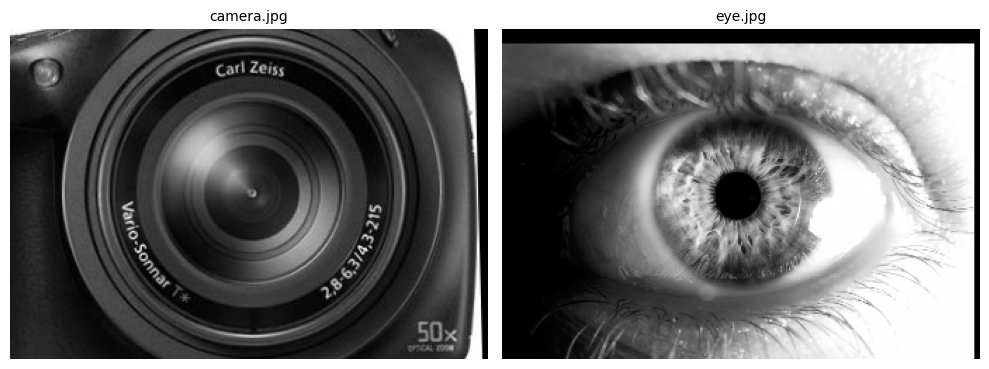

In [16]:

fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img3, cmap=plt.cm.gray)
ax[0].set_title("camera.jpg", size=10)
ax[0].set_axis_off()

ax[1].imshow(img4, cmap=plt.cm.gray)
ax[1].set_title("eye.jpg", size=10)
ax[1].set_axis_off()

plt.show()

First we apply a Gaussian filter to the eye image. The Gaussian filter is a low-pass filter. A low-pass filter passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.

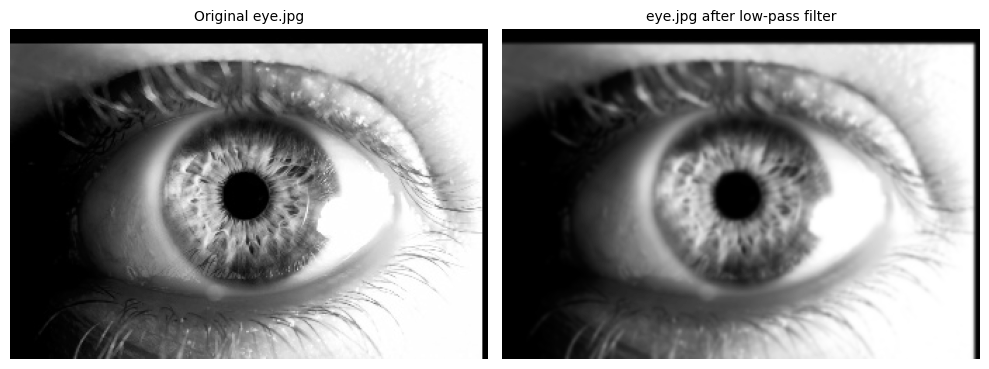

In [88]:

from skimage.filters import gaussian


# Apply low pass filter to img4.
lpf4 = gaussian(img4)


# Display results side by side. 
fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img4, cmap=plt.cm.gray)
ax[0].set_title("Original eye.jpg", size=10)
ax[0].set_axis_off()

ax[1].imshow(lpf4, cmap=plt.cm.gray)
ax[1].set_title("eye.jpg after low-pass filter", size=10)
ax[1].set_axis_off()

plt.show()


In the second step, we filter the camera image with a high pass filter. A high-pass filter passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency. One simple way to obtain a high-pass filter of an image is to apply a low pass filter as above, 
then subtract the result from the original image. This is also referred to as a *Laplacian filter*. 


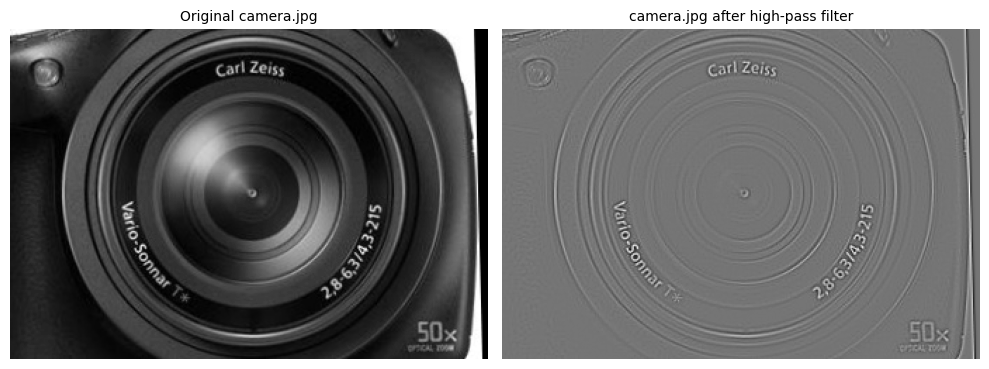

In [89]:


lpf3 = gaussian(img3)

# Subtract lpf3 from img3 to obtain high-pass filtered image.
hpf3 = img3 - lpf3


# Display results side by side. 
fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img3, cmap=plt.cm.gray)
ax[0].set_title("Original camera.jpg", size=10)
ax[0].set_axis_off()

ax[1].imshow(hpf3, cmap=plt.cm.gray)
ax[1].set_title("camera.jpg after high-pass filter", size=10)
ax[1].set_axis_off()

plt.show()

To create the hybrid image, we simply take the pixel-wise average of the low-pass and high-pass filtered results. In numpy, we can take advantage of broadcasting to perform the operation in a single expression:

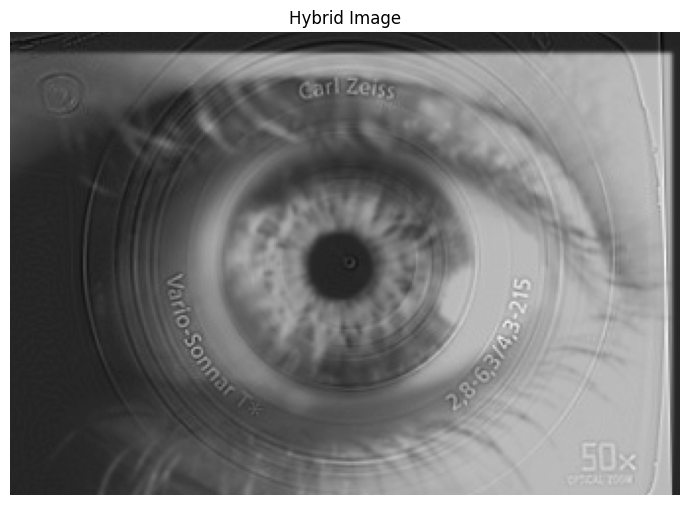

In [90]:

hybrid = (hpf3 + lpf4) / 2


fig, ax = plt.subplots(1, 1, figsize=(7, 7), tight_layout=False)

ax.imshow(hybrid, cmap=plt.cm.gray)
ax.set_title("Hybrid Image", size=12)
ax.set_axis_off()

plt.show()



We can also take the average of two images without any filtering. Consider our resized Tony Rice and sunflower images:

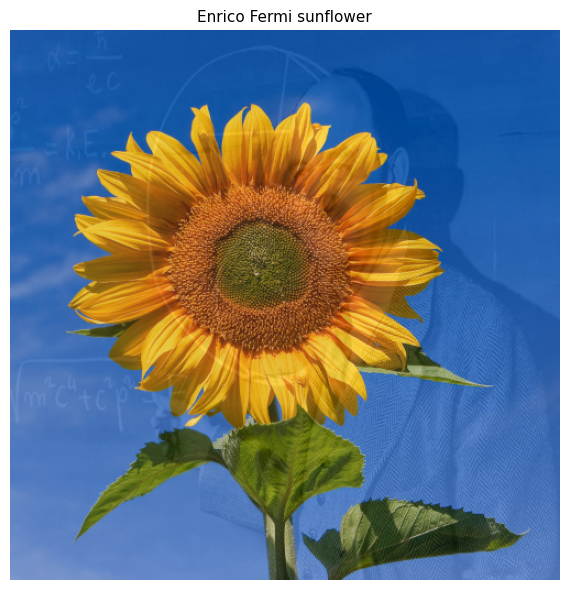

In [20]:


hybrid = .150 * resize1 + .850 * resize2


fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=False)

ax.imshow(hybrid)
ax.set_title("Enrico Fermi sunflower", size=11)
ax.set_axis_off()

plt.show()

## Selected Filters 
---

- Additional scikit-image filters: https://scikit-image.org/docs/stable/api/skimage.filters.html#module-skimage.filters


#### Sato filter
This filter can be used to detect continuous ridges, e.g. tubes, wrinkles, rivers.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


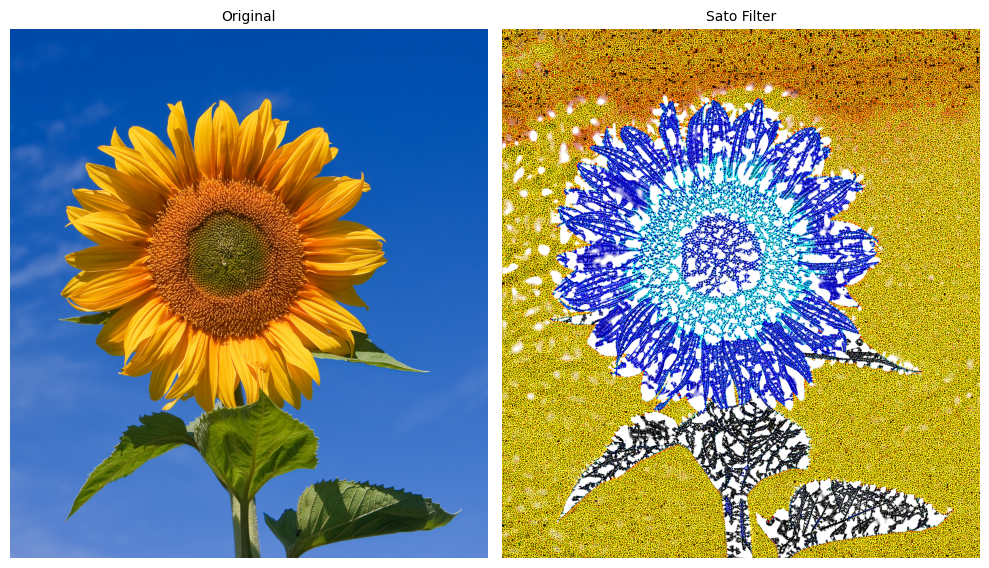

In [21]:

from skimage.filters import sato

img = sato(img2)



fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img2)
ax[0].set_title("Original", size=10)
ax[0].set_axis_off()

ax[1].imshow(img)
ax[1].set_title("Sato Filter", size=10)
ax[1].set_axis_off()

plt.show()


#### Butterworth filter
Apply a Butterworth filter to enhance high or low frequency features.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


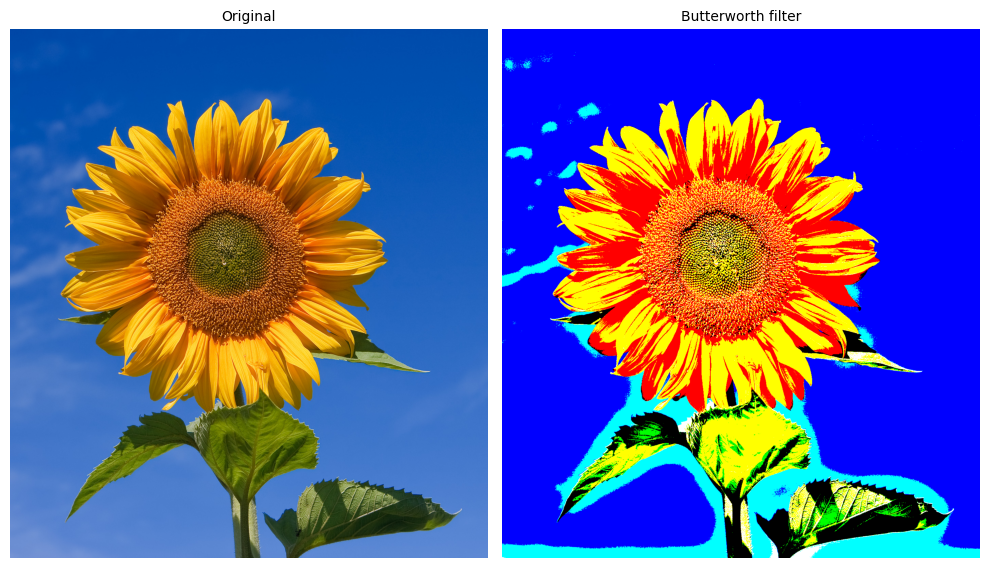

In [25]:

from skimage.filters import butterworth

img = butterworth(img2)


fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img2)
ax[0].set_title("Original", size=10)
ax[0].set_axis_off()

ax[1].imshow(img)
ax[1].set_title("Butterworth filter", size=10)
ax[1].set_axis_off()

plt.show()


Remember that we can always learn more about a function or class by looking up the documentation:

In [23]:
butterworth?

Signature:
butterworth(
    image,
    cutoff_frequency_ratio=0.005,
    high_pass=True,
    order=2.0,
    channel_axis=None,
    *,
    squared_butterworth=True,
    npad=0,
)
Docstring:
Apply a Butterworth filter to enhance high or low frequency features.

This filter is defined in the Fourier domain.

Parameters
----------
image : (M[, N[, ..., P]][, C]) ndarray
    Input image.
cutoff_frequency_ratio : float, optional
    Determines the position of the cut-off relative to the shape of the
    FFT. Receives a value between [0, 0.5].
high_pass : bool, optional
    Whether to perform a high pass filter. If False, a low pass filter is
    performed.
order : float, optional
    Order of the filter which affects the slope near the cut-off. Higher
    order means steeper slope in frequency space.
channel_axis : int, optional
    If there is a channel dimension, provide the index here. If None
    (default) then all axes are assumed to be spatial dimensions.
squared_butterworth : bool, op

**Unsharp mask:** <br>   The sharp details are identified as the difference between the original image and its blurred version. These details are then scaled, and added back to the original image.

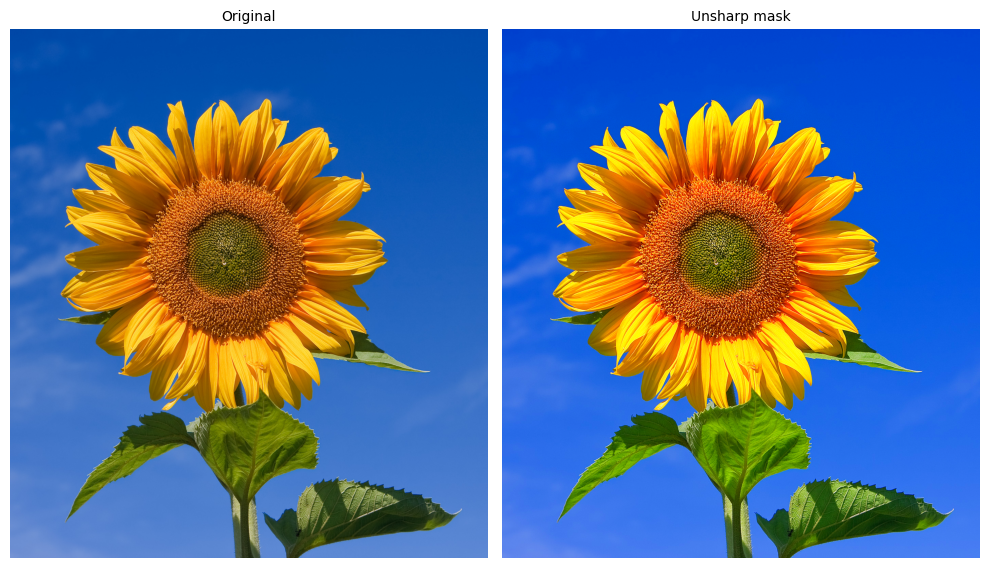

In [26]:


from skimage.filters import unsharp_mask

img = unsharp_mask(img2)


fig, ax = plt.subplots(1, 2, figsize=(10, 6), tight_layout=False)

ax[0].imshow(img2, cmap=plt.cm.gray)
ax[0].set_title("Original", size=10)
ax[0].set_axis_off()

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title("Unsharp mask", size=10)
ax[1].set_axis_off()

plt.show()


In [123]:
unsharp_mask?

Signature:
unsharp_mask(
    image,
    radius=1.0,
    amount=1.0,
    preserve_range=False,
    *,
    channel_axis=None,
)
Docstring:
Unsharp masking filter.

The sharp details are identified as the difference between the original
image and its blurred version. These details are then scaled, and added
back to the original image.

Parameters
----------
image : [P, ..., ]M[, N][, C] ndarray
    Input image.
radius : scalar or sequence of scalars, optional
    If a scalar is given, then its value is used for all dimensions.
    If sequence is given, then there must be exactly one radius
    for each dimension except the last dimension for multichannel images.
    Note that 0 radius means no blurring, and negative values are
    not allowed.
amount : scalar, optional
    The details will be amplified with this factor. The factor could be 0
    or negative. Typically, it is a small positive number, e.g. 1.0.
preserve_range : bool, optional
    Whether to keep the original range of values